<font size='+5' color='red'><b>PUBG Hacker Detection | t-SNE</b></font>

![](https://www.cerillion.com/cerillioncom/media/cerillionMedia/BlogImages/PUBG-Mobile.png?ext=.png?width=350)

<font size = '+4' color='blue'><b>Introduction</b></font>

<font size = '+3' color='Green'><b>What is t-SNE?</b></font>

* The full form of t-SNE is " t-distributed Stochastic Neighbor Embedding ". we will understand each word...
* Just read below bcause in python t-SNE is just few line of code, but it is better to understand it rather than remembering the code samples.

<font size = '+3' color='Green'><b>Why we use t-SNE?</b></font>
* When we have higher dimensional data like thousands of features we can not visualize it. That is why we use t-SNE to visualize that higher dimensional data in to lower dimesion.

* t-SNE is very complex mathematical algorithm we will not dive in the maths here but you will get proper idea about t-SNE after reading this.

* There is a phenominal blog about t-SNE, I have provided the link here. I just want to give full credits to the blog makers, its awesome!!!

link: https://distill.pub/2016/misread-tsne/

* So here our aim is just to visualize higher dimensinal data in to lower dimesion.......

<font size = '+3' color='Green'><b>How t-SNE works?</b></font>

### First we have to understand the meaning of each word in t-SNE
* t- distributed = the whole t-SNE algorithm is based on t- distribution which is just like other distribution like normal distribution etc..
* Stochastic = Means Probabilistic = Each time results may be slightly different 
* Neighbor = It calculates or uses distance between the neighbor points of a particular point.
* Embedding = For every point in higher dimension t-SNE will create a point in lower dimension = mapping of each and every point

### Working of t-SNE:

* Suppose there is a higher dimensinal data set in which there are few clusters (of course we can not visualize it but it is still there).
* If we want to create 2D plot of those clusters.
* What is neighborhood ??  In simple term it is the points which are closer to each other right? And what is not in neighborhood?? The points which are farther away from each other...
* Next question is how we can calculate that distance is far or not far?? Its simple " DIstance formula that we have learned in 11th or 12th class.( Note that distance formula can be applied to even higher dimesions)
* Note that : t-SNE will preserve the neighborhood, it doesn't guaranty about the farther point.
* t-SNE will map or locate each point in 2D such that the neighborhood of that point remains the same as in higher dimension.
* And that is it, working of t-SNE ...

<font size = '+3' color='Green'><b>Where t-SNE fails?</b></font>

1. When data clusters' sizes are different in higher dimesion then t-SNE fails to replicate that different sizes of clusters in 2D or lower dimension. (Cluster size means nothing in t-SNE plot)

2. Distance between clusters in t-SNE lower dimesional plot means nothing. In higher dimension clusters are at uneven distances but it is possible that in t-SNE distaces are even.

3. Sometimes t-SNE can create clusters which are origenally random points in higher dimension, which can mislead..

### For more information and visualization I highly recommend one to read the previously mentioned blog.


<font size = '+3' color='Green'><b>Common terms used in t-SNE:</b></font>

### Perplexity:

It means the number of neighbors you want t-SNE to consider as in neighborhood.
For example; If Preplexity = 100% means t-SNE will consider all the data points in the data set as the neighbor of one another which will not create better clusters and there will be only one big cluster

### Steps:

Means numbers of iterations you want to perform ... higher the iteration = better result = high computation time

<font size = '+3' color='Green'><b>Tips to effectively use t-SNE:</b></font>
1. Use Standardized Data
2. Don't use any single Perplexity value, use many perplexity values and you will find different shapes in each perplexity values.
3. Use fairly higher number of steps such that it will provide better result. Don't use too high value it will lead to higher time. Values between 3000 to 7000 are quite good but you can change according to your use and computational power.
4. It is based on probabilistic approach so use same Perplexity and steps frequent time, it will give you slightly different result.
5. In short try different combinations of perplexity and steps. Don't just depend on a single graph even it gives nice plots and clusters.


<font size = '+3' color='blue'><b>Lets get started...</b></font>


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from IPython.display import Image

### Note: We will use only solo players data here, one can use duos or squads.

In [3]:
data = pd.read_csv('PUBG.csv')

# Removing unnecessary features like squads and duos data

data.dropna(inplace=True)
data.drop(data.columns[np.arange(52,152,1)],axis=1,inplace=True)
data.drop(data.columns[[0,1]], axis=1, inplace=True)
data.drop(columns = ['solo_Revives'], inplace=True, axis=1)
data.drop(columns = ['solo_DBNOs'], inplace=True,axis=1)

data.head()

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,solo_WinPoints,solo_WalkDistance,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Boosts,solo_DamageDealt
0,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,...,2425,28924.31,27537.53,56461.84,2202.40,2764.50,304.87,33,29,4341.06
1,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,...,3812,47868.77,117837.74,165706.51,2017.38,5188.69,351.95,60,88,12970.39
2,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,...,2061,6340.79,7683.20,14023.99,1375.70,3052.50,125.76,5,3,1648.82
3,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,...,1484,17579.69,30314.83,47894.53,2197.46,3789.35,412.25,8,24,6015.57
4,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,...,1384,16736.41,22425.36,39161.77,2789.40,3737.56,307.97,12,21,3824.89


<font size = '+3' color='Blue'><b>Standardizing the Data</b></font>


In [4]:
scalar = StandardScaler()
std_data = scalar.fit_transform(data)
#df = pd.DataFrame(std_data[:10000,:])
#df.shape

<font size = '+3' color='Blue'><b>Implementing t-SNE</b></font>


<font size='+3' color='Orange'><b>Don't Run the below Cell it will take 1- 1.5 hour time, I have attached picture that will be created by after running the code for 1- 1.5 hours.</b></font>

In [ ]:
model = TSNE(n_components=2, perplexity = 500,n_iter= 2000,random_state = 1)
tsne_data = model.fit_transform(std_data)
df_tsne = pd.DataFrame(tsne_data,columns = ('Dimension_1','Dimension_2'))
plt.figure(figsize=(15,15))
sns.scatterplot(x='Dimension_1',y='Dimension_2',data=df_tsne)
plt.title('perplexity: 500 & n_iter: 2000')
plt.show();


<font size='+3' color='Orange'><b>Run the below Image('') Code to see the output of above code</b></font>

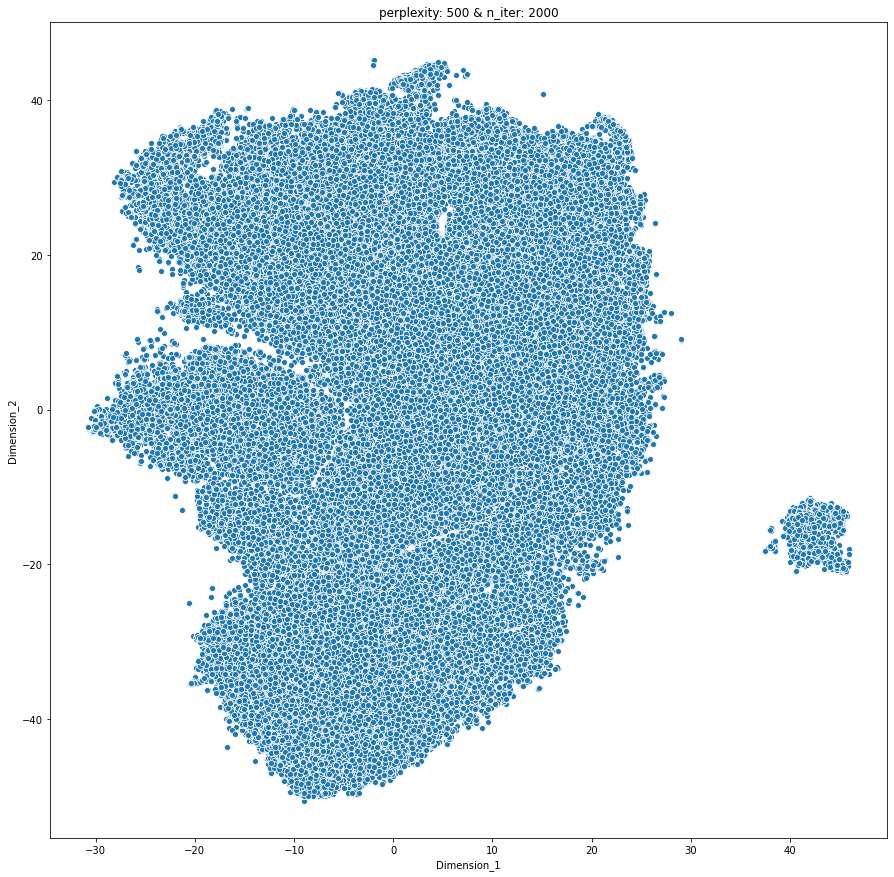

In [7]:
Image('pp-500 iter-2000.png')

<font size='+3' color='Orange'><b>Don't Run the below Cell it will take 1- 1.5 hour time, I have attached picture that will be created by after running the code for 1- 1.5 hours.</b></font>

In [ ]:
model = TSNE(n_components=2, perplexity = 1000,n_iter= 2000,random_state = 1)
tsne_data = model.fit_transform(std_data)
df_tsne = pd.DataFrame(tsne_data,columns = ('Dimension_1','Dimension_2'))
plt.figure(figsize=(15,15))
sns.scatterplot(x='Dimension_1',y='Dimension_2',data=df_tsne)
plt.title('perplexity: 1000 & n_iter: 2000')
plt.show();

<font size='+3' color='Orange'><b>Run the below Image('') Code to see the output of above code</b></font>

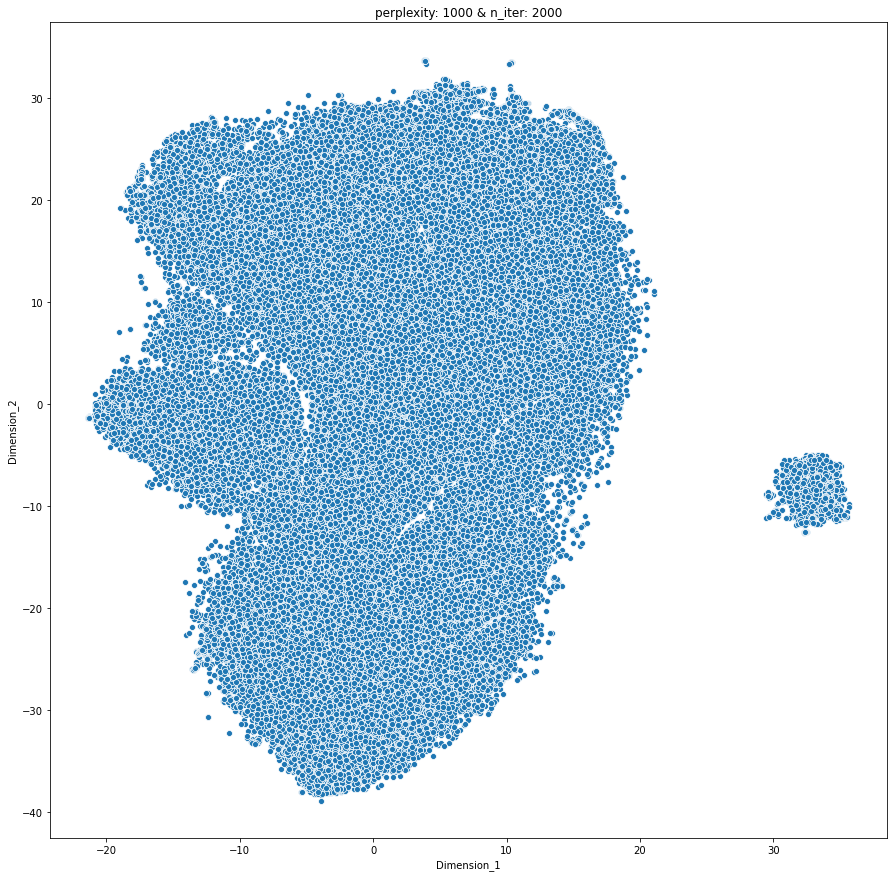

In [6]:
Image('pp-1000 iter-2000.png')

<font size='+3' color='Blue'><b> PROBLEM</b></font>

* The first problem is that I have too much data around 87000 rows and 48 features.
* For this huge data perplexity value is must be higher like around 5000 to 15000 ranges. It all depends on trial and error. It can be less that 5000 also we don't know and we have to try it.
* We can't use "For loop" here.
* I can't run t-SNE in to batches. ( You can use randomly shuffled data of 10000 rows but you can not combined all result...)
* After perplexity value 2000, One will run out of ram which Kaggle provides and session will restart.
* TPU or GPU can not be used here, even if you turn on GPU or TPU Kaggle platform will not use it. As far as I have tried.
* If you know how to use TPU in this, please explain me seriously I don't know and I want to learn... It will be helpful.

<font size='+3' color='Blue'><b>CONCLUSION</b></font>

* From this above figure we can say that there are some players which are very different from others ( May be hacekrs or may be other players) and we have successfully clustered them.
* We can count the numbers of players in that cluster by simple code of constrains in the dataframe, 
* Just a brief idea - The player having [ Dimension_1 (X-axis) > 25 ], then just count the rows by simple count code.

![](http://)

https://distill.pub/2016/misread-tsne/